In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df1=pd.read_csv('fct_invoice.csv')
df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [64]:
df2=pd.read_json('dim_customer.json')
df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [20]:
# Easy
# How many unique customers are in the dataset?
customers= df1.customer_id.nunique(dropna=True)
print('There are ' + str(customers) + ' unique customers!')

There are 5191 unique customers!


In [66]:
# Easy
# What are the different categories of products available? How many unique categories are there?
categories = df1.category.unique()
number_categories= len(categories)
print('The different products available are ' + str(categories) + '. There is a total of ' + str(number_categories) + '.')

The different products available are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']. There is a total of 8.


In [68]:
# Easy
# Which payment method is the most popular? How many times was it used?

payment_method = df1.groupby('payment_method')['payment_method'].count()
method = payment_method.idxmax()
counts = payment_method.max()


print('The most popular payment method is ' + str(method) + '. It was used ' + str(counts) + ' times.')

The most popular payment method is Cash. It was used 44447 times.


In [102]:
# Medium 1
# What are the three most popular categories, by total sales?

df1['sales']= df1['quantity'] * df1['price']
category_sales = df1.groupby('category')['sales'].sum().nlargest(3)

top_categories = list(category_sales.index)
top_category_sales = list(category_sales)

print(f'The top 3 categories are {top_categories}.')
print(f'Their total sales are {top_category_sales}.')

The top 3 categories are ['Clothing', 'Shoes', 'Technology'].
Their total sales are [113996791.03999999, 66553451.47, 57862350.0].


In [100]:
# Medium 2
# What are the total sales attributed to customers over the age of 45?

merged_df = pd.merge(df2, df1, left_on='id', right_on='customer_id')

over_45_df = merged_df[merged_df['age'] > 45]

total_sales_over_45 = over_45_df['sales'].sum()

print(f'The total sales for those over the age of 45 is {total_sales_over_45}')

The total sales for those over the age of 45 is 82039768.14999999


In [30]:
over_45_df

,age,first_name,gender,id,last_name,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,48.0,Nicholas,M,0,Flores,I254078,0,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,0,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17
2,48.0,Nicholas,M,0,Flores,I170558,0,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64
3,48.0,Nicholas,M,0,Flores,I187874,0,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40
4,48.0,Nicholas,M,0,Flores,I171870,0,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99447,84.0,Bryan,M,8888,Davis,I529365,8888,Clothing,1,300.08,Credit Card,4/11/2021,Metropol AVM,300.08
99448,48.0,Chad,M,8889,Hooper,I154835,8889,Toys,3,107.52,Cash,29/08/2021,Mall of Istanbul,322.56
99450,46.0,Lisa,F,9150,Reed,I212035,9150,Cosmetics,4,162.64,Credit Card,14/07/2021,Metrocity,650.56
99451,69.0,Deborah,F,9344,Delgado,I162702,9344,Shoes,2,1200.34,Cash,30/01/2021,Kanyon,2400.68


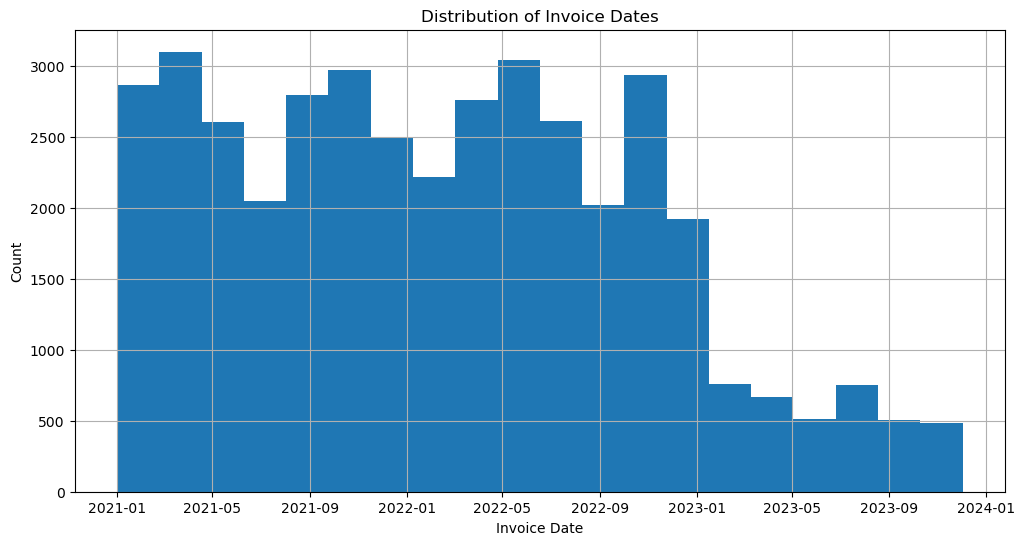

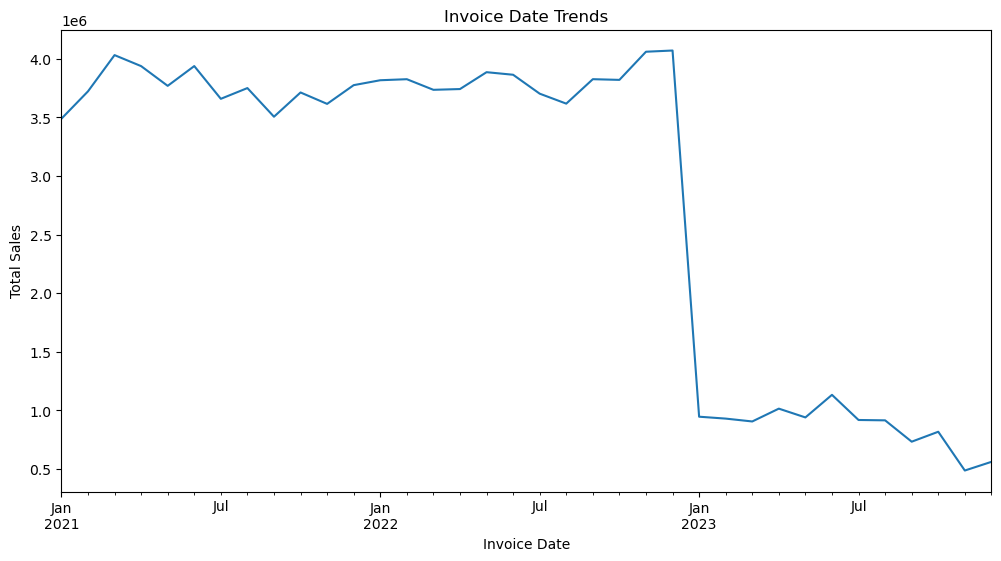

In [90]:
# Medium 3
# What are the total sales attributed to customers over the age of 45?

df1['sales']= df1['quantity'] * df1['price']
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%m/%d/%Y', errors='coerce')

# Histogram 
plt.figure(figsize=(12, 6))
df1['invoice_date'].hist(bins=20)
plt.title('Distribution of Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Count')
plt.show()

# Line Graph
plt.figure(figsize=(12, 6))
df1.groupby(pd.Grouper(key='invoice_date', freq='M'))["sales"].sum().plot(kind='line')
plt.title('Invoice Date Trends')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.show()

age_range        0-9       10-19        20-29        30-39        40-49  \
category                                                                  
Books            0.0    19891.95     80128.35     84446.10     82946.25   
Clothing         0.0  3029007.52  10079987.28  11516170.16  10933114.72   
Cosmetics        0.0   178009.48    594733.82    722406.22    656740.32   
Food & Beverage  0.0    20433.61     74271.23     89187.19     85034.57   
Shoes            0.0  1367187.26   6152942.84   7178633.37   6775319.13   
Souvenir         0.0    20128.68     53570.91     63705.63     65007.66   
Technology       0.0  1772400.00   5049450.00   6231750.00   5840100.00   
Toys             0.0    98273.28    380011.52    426460.16    378864.64   

age_range              50-59        60-69       70-79       80-89  90-99  
category                                                                  
Books               79537.50     76234.80    56251.95    21103.95    0.0  
Clothing         1081968

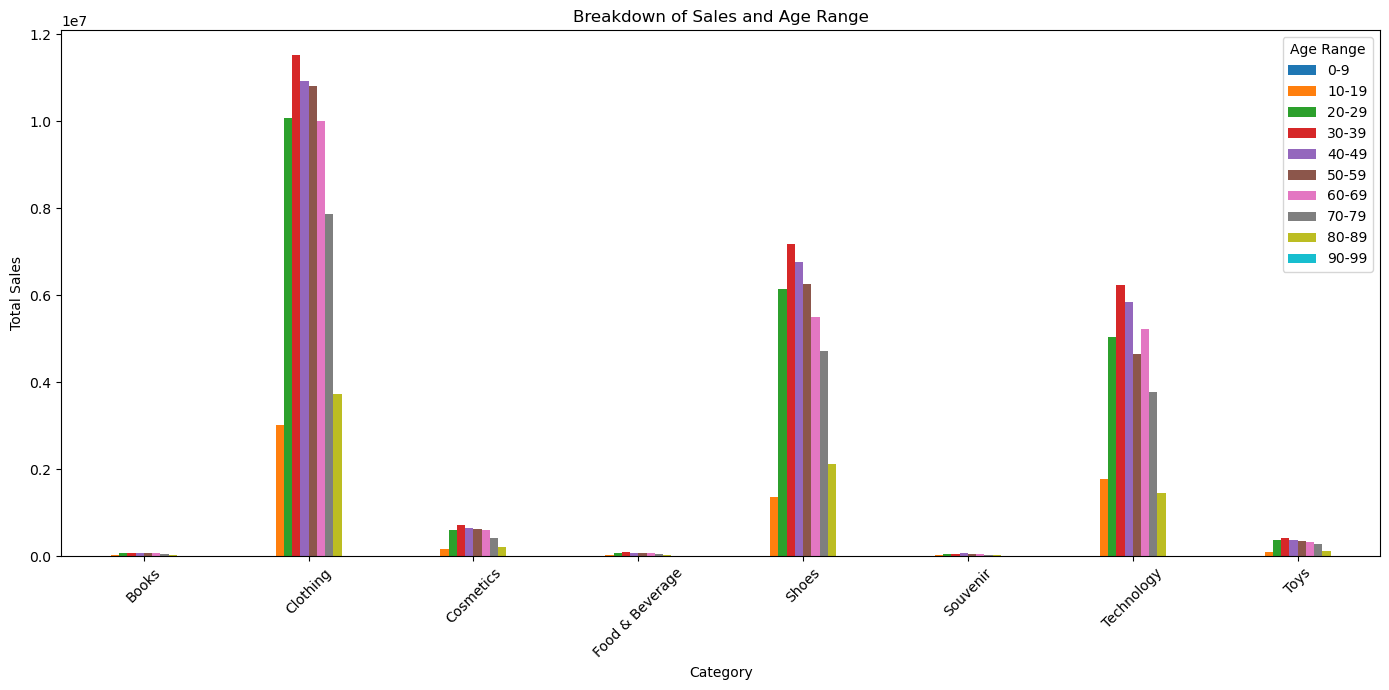

In [92]:
# Hard
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import matplotlib.pyplot as plt 
merged_df = pd.merge(df1, df2, left_on='customer_id', right_on='id')

merged_df['age_range'] = pd.cut(merged_df['age'], bins=range(0, 101, 10), labels=[f"{i}-{i+9}" for i in range(0, 91, 10)])

pivot_table = merged_df.pivot_table(index='category', columns='age_range', values='sales', aggfunc='sum')

print(pivot_table)

pivot_table.plot(kind='bar', figsize=(14, 7))
plt. xlabel ('Category') 
plt. ylabel ('Total Sales')
plt.title( 'Breakdown of Sales and Age Range')
plt.xticks(rotation=45)
plt. legend(title='Age Range')
plt. tight_layout()
plt.show()